<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INPUTS:" data-toc-modified-id="INPUTS:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INPUTS:</a></span></li><li><span><a href="#Time-Series-Evaluation-&amp;-Forecasting" data-toc-modified-id="Time-Series-Evaluation-&amp;-Forecasting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Evaluation &amp; Forecasting</a></span></li><li><span><a href="#Time-Series-Analysis-and-Forecasting" data-toc-modified-id="Time-Series-Analysis-and-Forecasting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Time Series Analysis and Forecasting</a></span></li><li><span><a href="#Markowitz-Portfolio-Optimization" data-toc-modified-id="Markowitz-Portfolio-Optimization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Markowitz Portfolio Optimization</a></span></li><li><span><a href="#Valuing-Securities-with-Pricing-Models" data-toc-modified-id="Valuing-Securities-with-Pricing-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Valuing Securities with Pricing Models</a></span></li><li><span><a href="#Measuring-Investment-Risk" data-toc-modified-id="Measuring-Investment-Risk-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Measuring Investment Risk</a></span><ul class="toc-item"><li><span><a href="#Calculating-a-Security’s-Risk-in-Python" data-toc-modified-id="Calculating-a-Security’s-Risk-in-Python-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Calculating a Security’s Risk in Python</a></span></li></ul></li><li><span><a href="#Simulating-stock-prices-in-Python-using-Geometric-Brownian-Motion" data-toc-modified-id="Simulating-stock-prices-in-Python-using-Geometric-Brownian-Motion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Simulating stock prices in Python using Geometric Brownian Motion</a></span></li><li><span><a href="#The-Complete-Guide-to-Time-Series-Analysis-and-Forecasting" data-toc-modified-id="The-Complete-Guide-to-Time-Series-Analysis-and-Forecasting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The Complete Guide to Time Series Analysis and Forecasting</a></span><ul class="toc-item"><li><span><a href="#Predicting-stock-price" data-toc-modified-id="Predicting-stock-price-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Predicting stock price</a></span></li><li><span><a href="#Monte-Carlo-simulations-in-finance" data-toc-modified-id="Monte-Carlo-simulations-in-finance-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Monte Carlo simulations in finance</a></span><ul class="toc-item"><li><span><a href="#Simulating-stock-price-dynamics-using-Geometric-Brownian-Motion" data-toc-modified-id="Simulating-stock-price-dynamics-using-Geometric-Brownian-Motion-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Simulating stock price dynamics using Geometric Brownian Motion</a></span></li></ul></li></ul></li></ul></div>

In [1]:
    ### Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
        ### Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
        ### Cufflinks binds Plotly directly to pandas dataframes.
import cufflinks as cf
cf.go_offline(connected=True)

    ### Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
        ### More Visualizations
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
        ### More Visualizations
import seaborn as sns
sns.set()
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product

    ### IMPORT API FUNCTIONS
/home/gordon/galvanize/notes/repos/knn/assignment.pdfimport quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import iexfinance
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import get_historical_intraday
from iexfinance.refdata import get_symbols
from iexfinance.data_apis import get_data_points
from iexfinance.data_apis import get_time_series
from iexfinance.altdata import get_social_sentiment
from iexfinance.altdata import get_ceo_compensation

    ### MISC LIB IMPORTS
import sys
import locale
from datetime import date, datetime, timedelta
from nsepy import get_history
from urllib.request import urlopen
import os
import time
import csv
import json
import requests
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

# INPUTS:

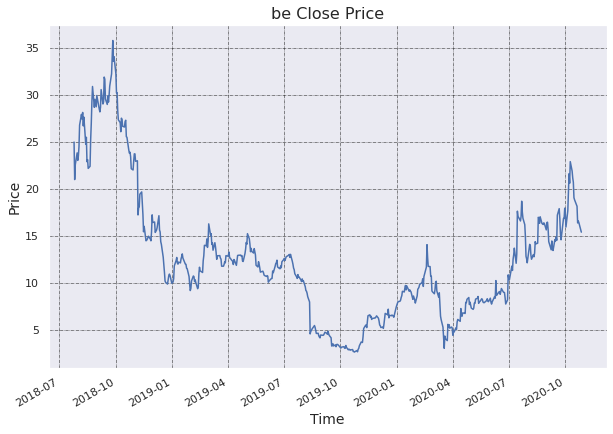

In [5]:
    #ticker = input('Ticker: ')
ticker = 'be'

    # Set the start and end date
start_date = '2010-04-01'
end_date = datetime.now()

    # Feth the data
data = pdr.get_data_yahoo(ticker, start=start_date,end=end_date)
data['Close'].plot(figsize=(10, 7))

    # Define the label for the title of the figure
plt.title(str(ticker)+" Close Price", fontsize=16)
    # Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
    # Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show();

data.tail();

# Time Series Evaluation & Forecasting

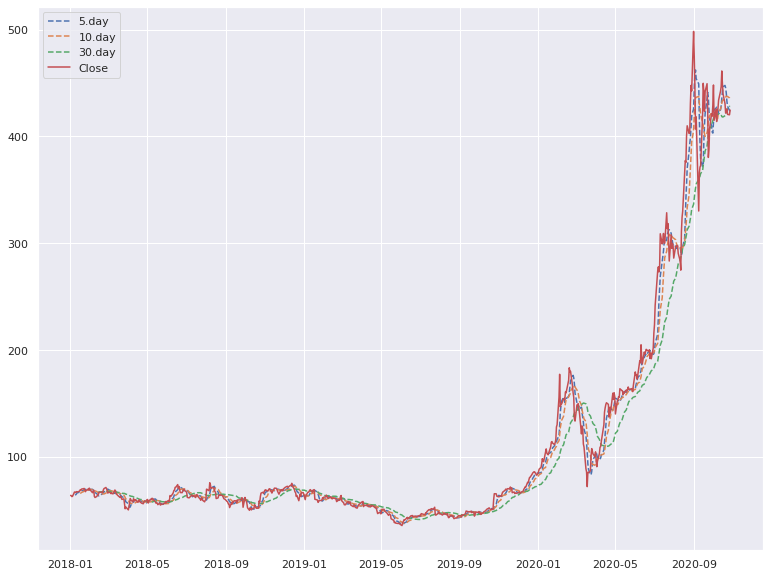

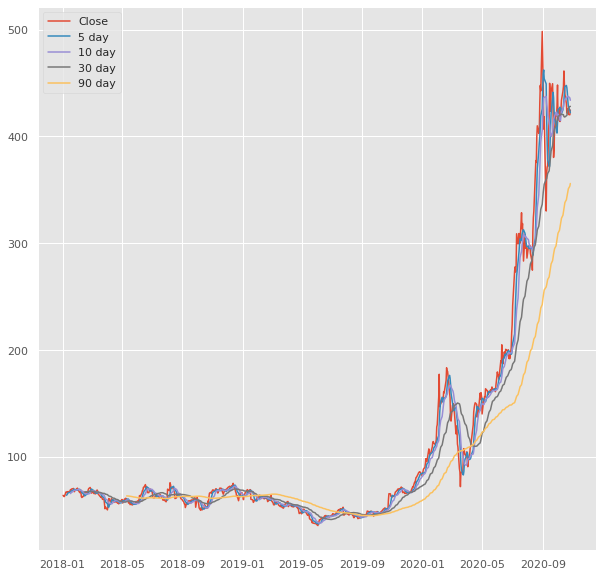

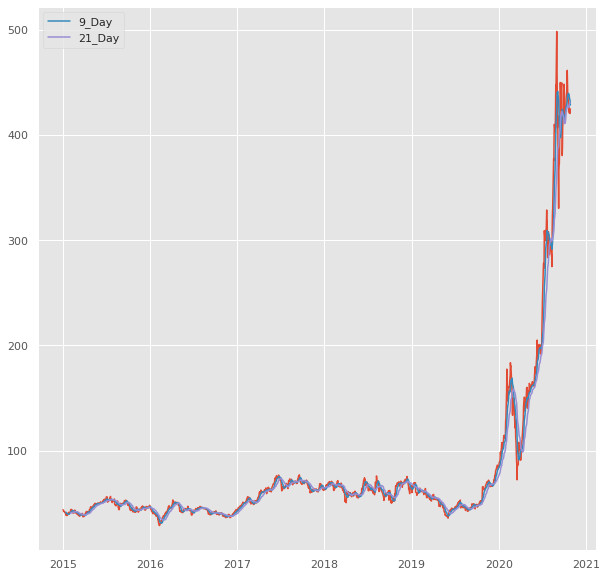

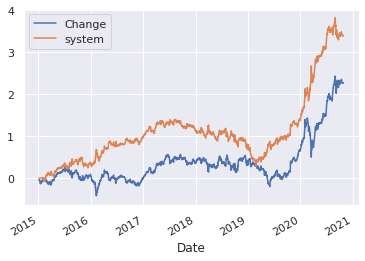

In [6]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

stock=wb.get_data_yahoo('TSLA',start='2018-01-01')
stock = stock.drop(['Adj Close','Volume','Open','Low','High'], axis=1)
#stock = stock.drop('Adj Close', axis=1)


### moving average
stock['5.day']=stock['Close'].rolling(5).mean().shift()
stock['MAD.5']=np.abs(stock['Close']-stock['5.day'])

stock['10.day']=stock['Close'].rolling(10).mean().shift()
stock['MAD.10']=np.abs(stock['Close']-stock['10.day'])

stock['30.day']=stock['Close'].rolling(30).mean().shift()
stock['MAD.30']=np.abs(stock['Close']-stock['30.day'])

stock['90.day']=stock['Close'].rolling(90).mean().shift()
stock['MAD.90']=np.abs(stock['Close']-stock['90.day'])


plt.figure(figsize=(13,10))
plt.plot(stock['5.day'],'--', label='5.day')
plt.plot(stock['10.day'],'--', label='10.day')
plt.plot(stock['30.day'],'--', label='30.day')
#plt.plot(stock['90.day'], label='90.day')
plt.plot(stock['Close'], label='Close')
plt.legend()
plt.show()

with plt.style.context('ggplot'):
    plt.figure(figsize=(10,10))
    plt.plot(stock.Close,label='Close')
    plt.plot(stock['5.day'], label='5 day')
    plt.plot(stock['10.day'], label='10 day')
    plt.plot(stock['30.day'], label='30 day')
    plt.plot(stock['90.day'], label='90 day')
    plt.legend()
    plt.show()

stock.tail()

import numpy as np
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

# PULL HISTORICAL DATA DAILY
stock=pdr.get_data_yahoo('TSLA',start='2015-01-01')
stock.drop(['Adj Close','Volume'], axis=1, inplace=True)

# RESAMPLE IN WEEKLY DATA
stock_W=pd.DataFrame(stock.resample('W').last())

# RESAMPLE IN MONTHLY DATA
stock_M=pd.DataFrame(stock.resample('M').last())


# MODEL WEEKLY DATASET
model = ses(stock_W['Close'])
model_fit_W=model.fit()
model_fit_W.predict()

# MODEL MONTHLY DATASET
model = ses(stock_M['Close'])
model_fit_M=model.fit()
model_fit_M.predict()

# WEEKLY
y_hat_W=model_fit_W.fittedvalues

# MONTHLY
y_hat_M=model_fit_M.fittedvalues

# MEAN ABSOLUTE DEVIATION NJMK,LO['/']
stock_W['W']=stock_W['Close'].rolling(5).mean().shift()
stock_W['MAD_W']=np.abs(stock_W['Close']-stock_W['W'])

stock_M['M']=stock_M['Close'].rolling(5).mean().shift()
stock_M['MAD_M']=np.abs(stock_M['Close']-stock_M['M'])

# MEAN PERCENT ERROR
stock_W['MAPE_W']=stock_W['MAD_W']/stock_W['Close']

stock_M['MAPE_M']=stock_M['MAD_M']/stock_M['Close']

# MEAN SQUARED ERROR
stock_W['MSE_W']=stock_W['MAD_W']**2
MSE_W=stock_W['MSE_W'].mean()

stock_M['MSE_M']=stock_M['MAD_M']**2
MSE_M=stock_M['MSE_M'].mean()

RMSE_W = np.sqrt(MSE_W)
RMSE_W

RMS_M = np.sqrt(MSE_M)
RMS_M

# WEEKLY
model_fit_W.params

# MONTHLY
model_fit_M.params

values= pd.DataFrame({'alpha': np.zeros(10), 'MSE_W': np.zeros(10)})
alpha=.1
for i in range(10):
    model=ses(stock_W['Close'])
    stock_W['Forecast']=model.fit(alpha).fittedvalues
    stock_W['MSE_W'].mean()
    values['alpha'][i]=alpha
    values['MSE_W'][i]=MSE_W
    alpha+=0.1
    
values_M= pd.DataFrame({'alpha': np.zeros(10), 'MSE_M': np.zeros(10)})
alpha_M=.1
for i in range(10):
    model_M=ses(stock_M['Close'])
    stock_M['Forecast']=model.fit(alpha).fittedvalues
    stock_M['MSE_M'].mean()
    values_M['alpha'][i]=alpha_M
    values_M['MSE_M'][i]=MSE_M
    alpha_M+=0.1
    
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

df=pdr.get_data_yahoo('TSLA','2015-01-01')
df.drop(['Adj Close','Volume','High','Low','Open'], axis=1, inplace=True)


df['9day']=df['Close'].rolling(9).mean()
df['21day']=df['Close'].rolling(21).mean()
df['Change']=np.log(df.Close/df.Close.shift())


with plt.style.context('ggplot'):
    plt.figure(figsize=(10,10))
    plt.plot(df.Close)
    plt.plot(df['9day'], label='9_Day')
    plt.plot(df['21day'], label='21_Day')
    plt.legend(loc=2)
    plt.show
    
    
df['position']=np.where(df['9day']>df['21day'],1,0)
df['position']=np.where(df['9day']<df['21day'],-1,df['position'])

df['system']=df['position']*df['Change']
df[['Change','system']].cumsum().plot();

# Time Series Analysis and Forecasting

In [8]:
pwd

'/home/gordon/one/self_build/colab'

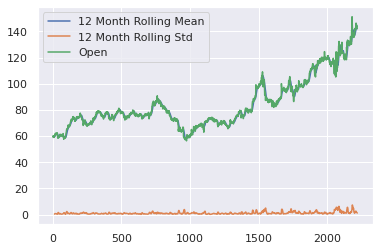

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.6565188082487063
p-value : 0.9889289595976657
#Lags Used : 20
Number of Observations Used : 2199
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.05187560336606
p-value : 5.056130218509212e-20
#Lags Used : 19
Number of Observations Used : 2199
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                 2220
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -4255.167
Date:                            Tue, 27 Oct 2020   AIC                           8512.335
Time:                                    21:20:45   BIC                           8518.034
Sample:                    

<Figure size 432x288 with 0 Axes>

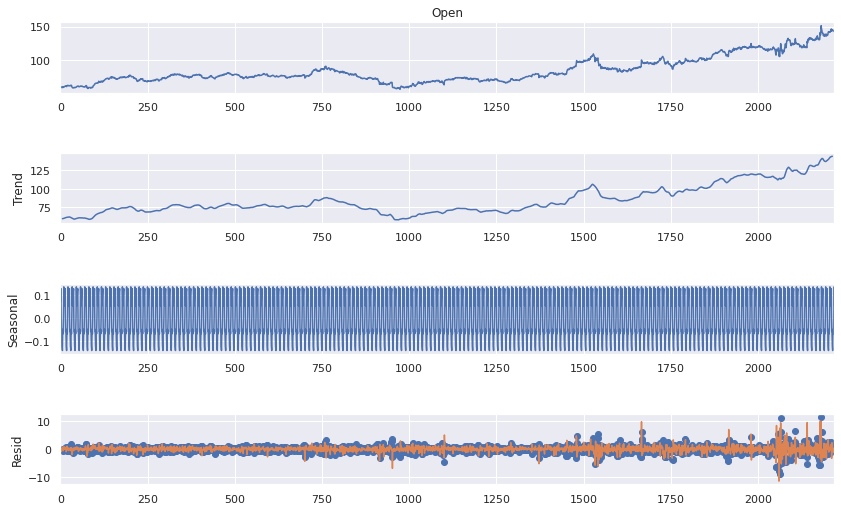

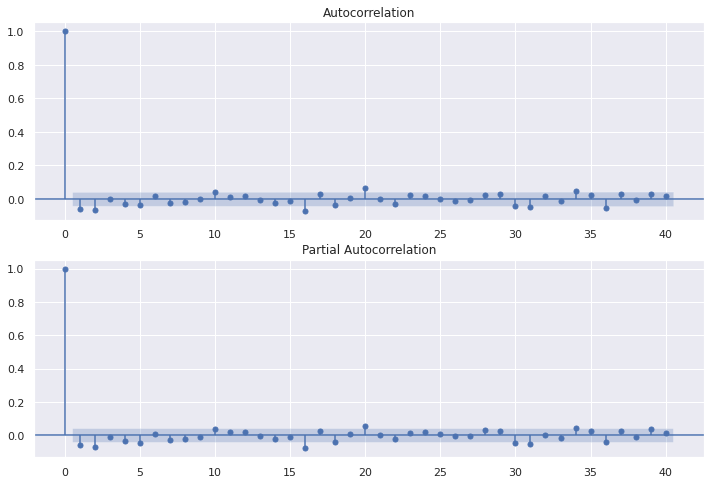

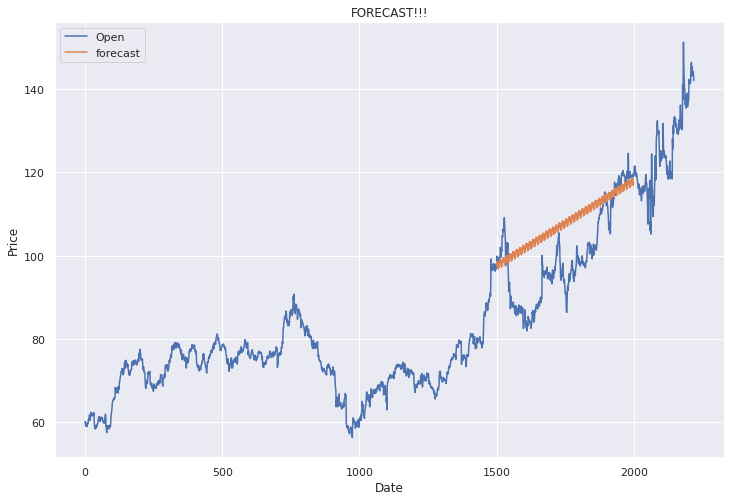

In [12]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

df1=pdr.DataReader('WMT',data_source='yahoo',start='2012-1-3')
df1.to_csv('data/ts_forecast.csv')
df = pd.read_csv('data/ts_forecast.csv')
df['Date1']=df['Date']
df.set_index('Date1')
timeseries = df['Open']

timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()
plt.show();

decomposition = seasonal_decompose(df['Open'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(13, 8)

# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adf_check(df['Open'])
df['Open First Difference'] = df['Open'] - df['Open'].shift(1)
adf_check(df['Open First Difference'].dropna())
df['Open First Difference'].plot()
print('')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].iloc[13:], lags=40, ax=ax1);
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].iloc[13:], lags=40, ax=ax2);

model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(0,1,0,12))             
results = model.fit()          
print(results.summary())

df['forecast'] = results.predict(start = 1500, end= 2000, dynamic= True) 
df[['Open','forecast']].plot(figsize=(12,8))

plt.title('FORECAST!!!')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show();

# Markowitz Portfolio Optimization

* Markowitz Portfolio theory – One of the main pillars of modern Finance
* Obtaining the Efficient Frontier in Python – Part I
* Obtaining the Efficient Frontier in Python – Part II
* Obtaining the Efficient Frontier in Python – Part III

Annual_log_returns = 
PG       0.108764
^GSPC    0.100640
dtype: float64

Annual_Cov = 
             PG     ^GSPC
PG     0.029191  0.017920
^GSPC  0.017920  0.030671

Corr = 
             PG     ^GSPC
PG     1.000000  0.598893
^GSPC  0.598893  1.000000

ARR = 
1.602015296584817

WEIGHTS = 
1.0
EXPECTED PORTFOLIO RETURN = 10.530470%
EXPECTED PORTFOLIO VARIANCE = 2.394753%
EXPECTED PORTFOLIO VOLATILITY = 15.474988%


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


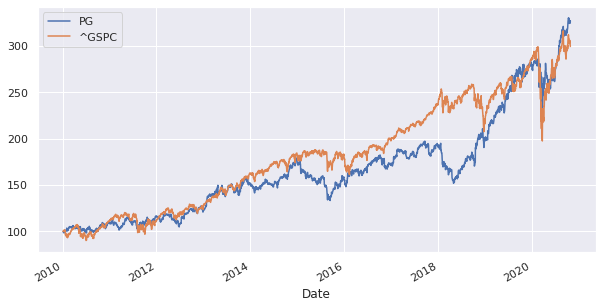

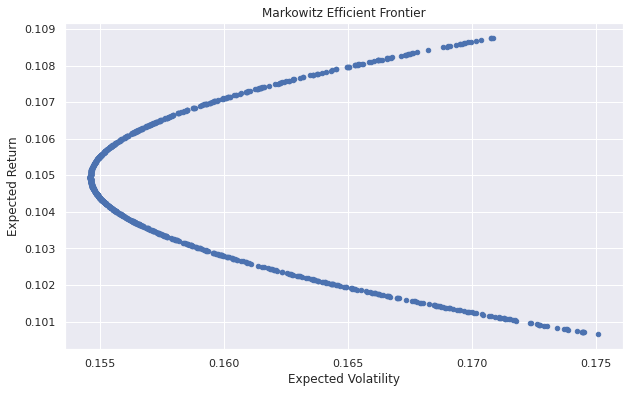

In [13]:
########################### Obtaining the Efficient Frontier - Part I
### DATA PULL
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

(pf_data / pf_data.iloc[0]*100).plot(figsize = (10,5))

log_returns = np.log(pf_data / pf_data.shift(1))
Annual_log_returns = log_returns.mean()*250
Annual_Cov = log_returns.cov()*250
Corr = log_returns.corr()


num_assets = len(assets)
arr = np.random.random(2)
ARR = arr[0] + arr[1]


weights = np.random.random(num_assets)
weights /= np.sum(weights)
WEIGHTS = weights[0] + weights[1]

print('Annual_log_returns = ')
print(Annual_log_returns)
print('')
print('Annual_Cov = ')
print(Annual_Cov)
print('')
print('Corr = ')
print(Corr)
print('')
print('ARR = ')
print(ARR)
print('')
print('WEIGHTS = ')
print(WEIGHTS)


################################################# Obtaining the Efficient Frontier–Part II
### EXPECTED PORTFOLIO RETURN:
port_est_ror = np.sum(weights * log_returns.mean())*250
print('EXPECTED PORTFOLIO RETURN = ' + f'{port_est_ror:%}')


### EXPECTED PORTFOLIO VARIANCE
port_est_var = np.dot(weights.T, np.dot(log_returns.cov()*250, weights))
print('EXPECTED PORTFOLIO VARIANCE = ' + f'{port_est_var:%}')


### EXPECTED PORTFOLIO VOLATILITY
port_est_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
print('EXPECTED PORTFOLIO VOLATILITY = ' + f'{port_est_vol:%}')


pfolio_returns =[]
pfolio_volatilities =[]

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, 
                                              np.dot(log_returns.cov()*250,weights))))
#pfolio_returns, pfolio_volatilities


pfolio_returns =[]
pfolio_volatilities =[]

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, 
                                              np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)   
#pfolio_returns, pfolio_volatilities



################################ Obtaining the Efficient Frontier – Part III
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


### PLOT THE EFFICIENT FRONTIER
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Markowitz Efficient Frontier')
plt.show();

# Valuing Securities with Pricing Models

Expected_Return 0.19023591087811265

Current_Value:152.6



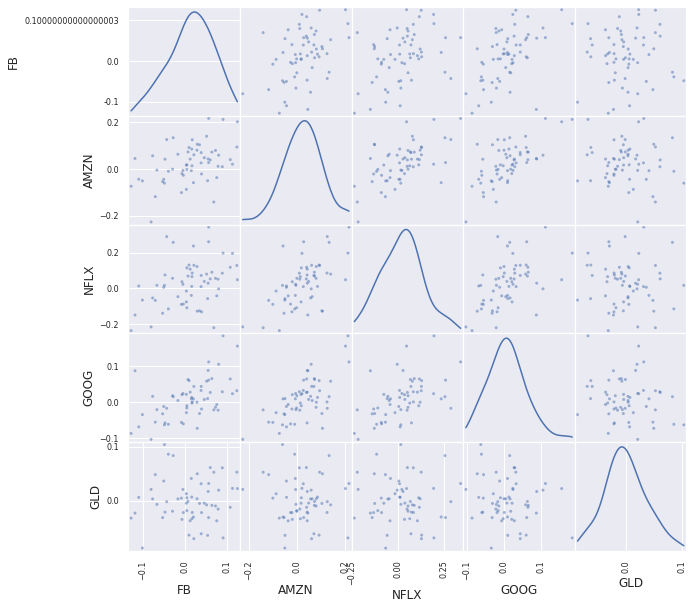

In [15]:
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

aapl=pdr.get_data_yahoo('AAPL','2015-01-01')

# EXPECTED RETURN OF AAPL
div = 2.92
pO=152.60
p1=178.71
er=(div+p1)/pO
print('Expected_Return {}'.format(er-1))
print('')
pv=(div+p1)/er
print('Current_Value:{}'.format(pv))

# DIVIDEND DISCOUNT MODEL
g=0.08
er=0.12
p1=81
div=3.0

horizon=pd.DataFrame({'div':np.zeros(3), 'exp_price':np.zeros(3)})
horizon.index=np.arange(1,len(horizon)+1)
horizon.index.name='Year'

for year in range(1,horizon['div'].count()+1):
    if year ==1:
        horizon['div'][year]=div
        horizon['exp_price'][year]=p1
    else:
        horizon['div'][year]=div*(1+g)**(year-1)
        horizon['exp_price'][year]=p1*(1+g)**(year-1)

(horizon['div'][1]+horizon['exp_price'][1])/(1+er)
horizon['div'][1]/(1+er)+(horizon['div'][2]+horizon['exp_price'][2])/(1+er)**2

# CONSTANT GROWTH MODEL
div=3
g=0.08
er=0.12
div/(er-g)

# WHAT ABOUT STOCKS WITH NO DIVIDENDS?
eps=5.6
pe=15.0
er=0.12
eps*pe/(1+er)
ea=5.30
ea*pe/(1.0+er)

###############################################
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

stocks='FB AMZN NFLX GOOG GLD'.split()
data=pdr.get_data_yahoo(stocks,'2014-01-01')['Close']
data=data.resample('BM').last()

data=data[:60]

change=pd.DataFrame()

for month in data:
    if month not in change:
        change[month]=np.log(data[month]).diff()

change.corr()

corr=change.corr()
corr['FB'].sort_values(ascending=False)

pd.plotting.scatter_matrix(change, diagonal='kde',figsize=(10,10))
print('');

#  Measuring Investment Risk
* 

* How do we measure a security's risk
* Calculating a Security’s Risk in Python
* The benefits of portfolio diversification
* Calculating the covariance between securities
* Measuring the correlation between stocks
* Calculating Covariance and Correlation
* Considering the risk of multiple securities in a portfolio
* Calculating Portfolio Risk
* Understanding Systematic vs. Idiosyncratic risk
* Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

## Calculating a Security’s Risk in Python

In [16]:
tickers =['PG','BEI.DE']

sec_data=pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']
    
### CALC LOG RETURNS
sec_RoR = np.log(sec_data / sec_data.shift(1))
sec_RoR



### PG (DAILY ROR / ANNUAL ROR / STD)
### DAILY MEAN ROR
sec_RoR['PG'].mean()
sec_RoR_D = sec_RoR['PG'].mean()

### ANNUAL MEAN ROR
sec_RoR_A = sec_RoR['PG'].mean()*250

### STD DAILY
sec_RoR['PG'].std()

### STD ANNUAL
sec_RoR_A_std = sec_RoR['PG'].std()*250**0.5
print('Annual STD: ' + f'{sec_RoR_A_std:%}')
print('')
print('Daily-Log-Mean-RoR: ' + f'{sec_RoR_D:%}')
print('')
print('Annual-Log-Mean-RoR: ' + f'{sec_RoR_A:%}')



### Beiersdorf (DAILY ROR / ANNUAL ROR / STD)
### DAILY MEAN ROR
sec_RoR['BEI.DE'].mean()
sec_RoR_D = sec_RoR['BEI.DE'].mean()

### ANNUAL MEAN ROR
sec_RoR_A = sec_RoR['BEI.DE'].mean()*250

### STD DAILY
sec_RoR['BEI.DE'].std()

### STD ANNUAL
sec_RoR_A_std = sec_RoR['BEI.DE'].std()*250**0.5

print('Annual STD: ' + f'{sec_RoR_A_std:%}')
print('')
print('Daily-Log-Mean-RoR: ' + f'{sec_RoR_D:%}')
print('')
print('Annual-Log-Mean-RoR: ' + f'{sec_RoR_A:%}')



### Calculating Covariance and Correlation
### Variance Daily
PG_var = sec_RoR['PG'].var()
print('PG_var '+'Daily_Variance: ' + f'{PG_var:%}')
print('')

BEI_var = sec_RoR['BEI.DE'].var()
print('BEI_var '+'Daily_Variance: ' + f'{BEI_var:%}')

### Variance Annually
PG_var_A = sec_RoR['PG'].var()*250
print('PG_var_A '+'Daily_Variance: ' + f'{PG_var_A:%}')
print('')

BEI_var_A = sec_RoR['BEI.DE'].var()*250
print('BEI_var_A '+'Daily_Variance: ' + f'{BEI_var_A:%}')



### Covariance Matrix
    ### DAILY COVARIANCE MATRIX
cov_matrix_D = sec_RoR.cov()
print(cov_matrix_D)



### ANNUAL COVARIANCE MATRIX
cov_matrix_A = sec_RoR.cov()*250
print(cov_matrix_A)



## CORRELATION Matrix
    ### DAILY CORRELATION MATRIX
corr_matrix_D = sec_RoR.corr()
corr_matrix_D



## Calculating Portfolio Risk
    ### EQUAL WEIGHT SCHEME:
weights = np.array([0.5, 0.5])


### PORTFOLIO VARIANCE:
pfolio_var = np.dot(weights.T, np.dot(sec_RoR.cov()*250, weights))
print('PORTFOLIO_Variance = ' + f'{pfolio_var:%}')


### PORTFOLIO VOLATILITY:    
pfolio_vol = np.dot(weights.T, np.dot(sec_RoR.cov()*250, weights))**0.5
print('PORTFOLIO_VOLATILITY = ' + f'{pfolio_vol:%}')


## Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio
weights = np.array([0.5, 0.5])
weights[0]
weights[1]


### DIVERSIFIABLE_RISK:
PG_var_A = sec_RoR[['PG']].var()*250
PG_var_A

BEI_var_A = sec_RoR[['BEI.DE']].var()*250
BEI_var_A

pg_var_a = (weights[0]**2*PG_var_A)
pg_var_a=float(pg_var_a)

bei_var_a = (weights[1]**2*BEI_var_A)
bei_var_a=float(bei_var_a)

pfolio_var=float(pfolio_var)

dr = pfolio_var - pg_var_a - bei_var_a
print('ANNUAL_DIVERSIFIABLE_RISK = ' + f'{dr:%}')


### NON-DIVERSIFIABLE RISK:
n_dr_1 = pfolio_var - dr
print('ANNUAL_NON-DIVERSIFIABLE RISK = ' + f'{n_dr_1:%}')

pg_n_dr_2 = (weights[0]**2*PG_var_A)
pg_n_dr_2 = float(pg_var_a)

bei_n_dr_2 = (weights[1]**2*BEI_var_A)
bei_n_dr_2=float(bei_var_a)

n_dr_2 = pg_n_dr_2 + bei_n_dr_2

print('ANNUAL_NON-DIVERSIFIABLE RISK = ' + f'{n_dr_2:%}')

n_dr_1 == n_dr_2

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2020-10-21,0.005390,-0.019010
2020-10-22,-0.007108,-0.004860
2020-10-23,0.006553,0.008087


0.0003465532390957933

0.011891511229911942

Annual STD: 18.802130%

Daily-Log-Mean-RoR: 0.034655%

Annual-Log-Mean-RoR: 8.663831%


0.0002588264264826856

0.013804835498996434

Annual STD: 21.827361%

Daily-Log-Mean-RoR: 0.025883%

Annual-Log-Mean-RoR: 6.470661%
PG_var Daily_Variance: 0.014141%

BEI_var Daily_Variance: 0.019057%
PG_var_A Daily_Variance: 3.535201%

BEI_var_A Daily_Variance: 4.764337%
              PG    BEI.DE
PG      0.000141  0.000045
BEI.DE  0.000045  0.000191
              PG    BEI.DE
PG      0.035352  0.011140
BEI.DE  0.011140  0.047643


,PG,BEI.DE
PG,1.000000,0.270961
BEI.DE,0.270961,1.000000


PORTFOLIO_Variance = 2.631902%
PORTFOLIO_VOLATILITY = 16.223137%


0.5

0.5

PG    0.035352
dtype: float64

BEI.DE    0.047643
dtype: float64

ANNUAL_DIVERSIFIABLE_RISK = 0.557017%
ANNUAL_NON-DIVERSIFIABLE RISK = 2.074885%
ANNUAL_NON-DIVERSIFIABLE RISK = 2.074885%


True

# Simulating stock prices in Python using Geometric Brownian Motion
* A high-level description of the dynamics and the main drivers of Geometric Brownian Motion with a sample Python code

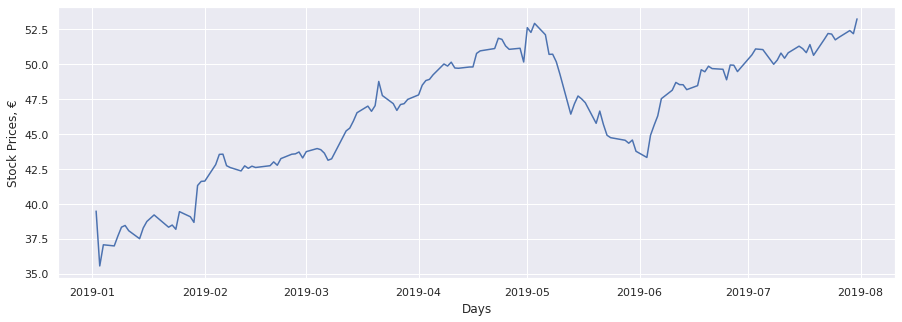

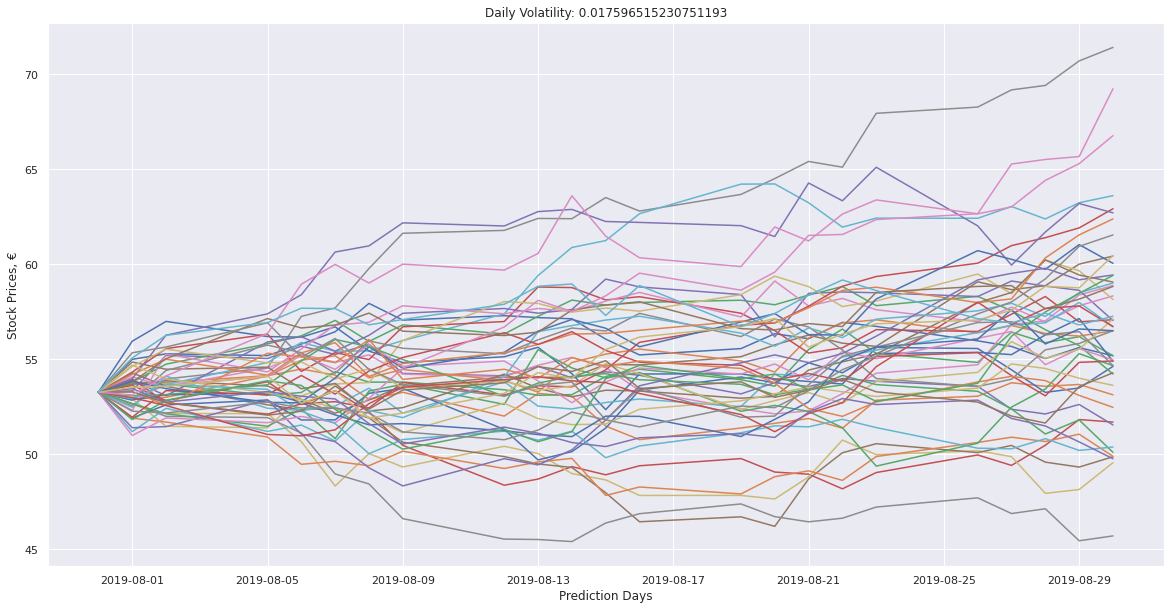

In [19]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stock_name = 'AAPL'

prices = wb.DataReader(stock_name, data_source='yahoo',
                       start = '2019-01-01',
                       end='2019-07-31').reset_index(drop=False)[['Date',
                                                                      'Close']]
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

#------------------ GEOMETRIC BROWNIAN MOTION ---------------------------------------

    # Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict,
            #same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

start_date = '2019-07-01'
end_date = '2019-07-31'
pred_end_date = '2019-08-31'

    # We get daily closing stock prices of E.ON for July 2019
S_eon = wb.DataReader(stock_name, data_source='yahoo',
                       start = '2019-01-01',
                       end='2019-07-31').reset_index(drop=False)[['Date',
                                                                      'Close']]

returns = (S_eon.loc[1:, 'Close'] - \
           S_eon.shift(1).loc[1:, 'Close']) / \
           S_eon.shift(1).loc[1:, 'Close']

    # Parameter Assignments
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
#print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
#print(diffusion)

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1,
                                                                          scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
# add So to the beginning series
#print(S)

# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show();

# Dataframe format for predictions - first 10 scenarios only
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :10]).set_index(
           pd.date_range(start = S_eon["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False);

# The Complete Guide to Time Series Analysis and Forecasting

* Understand moving average, exponential smoothing, stationarity, autocorrelation, SARIMA, and apply these techniques

##  Predicting stock price

<Figure size 1224x576 with 0 Axes>

Text(0.5, 1.0, 'Closing price of TSLA')

Text(0, 0.5, 'Closing price ($)')

Text(0.5, 0, 'Trading day')

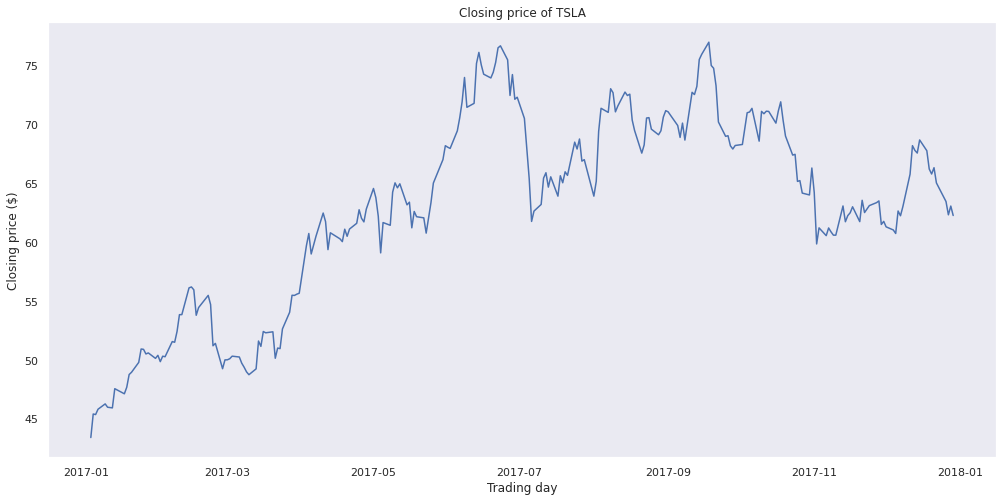

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500,43.397999
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500,45.397999
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500,45.349998
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500,45.801998
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500,46.256001
...,...,...,...,...,...,...
2017-12-22,66.183998,64.963997,65.902000,65.040001,21079000,65.040001
2017-12-26,64.788002,63.316002,64.765999,63.458000,21892000,63.458000
2017-12-27,63.535999,62.150002,63.200001,62.327999,23560500,62.327999


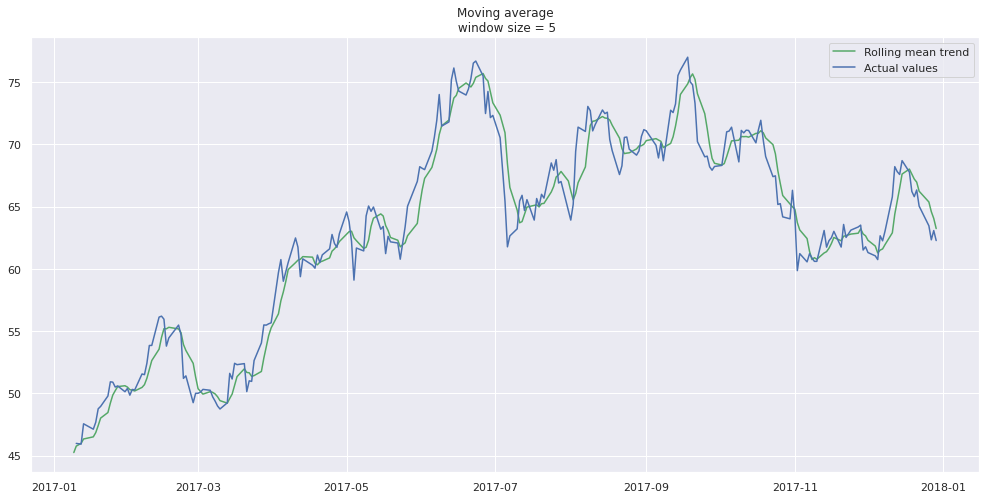

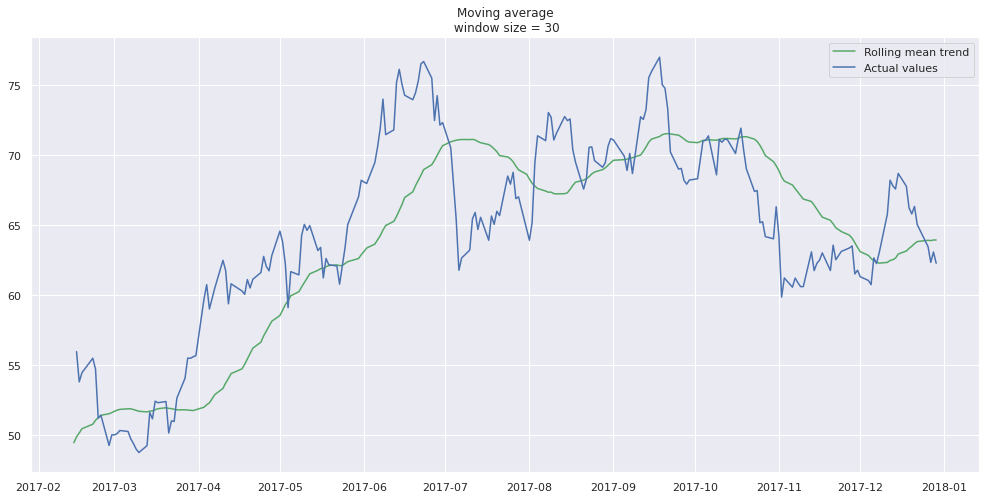

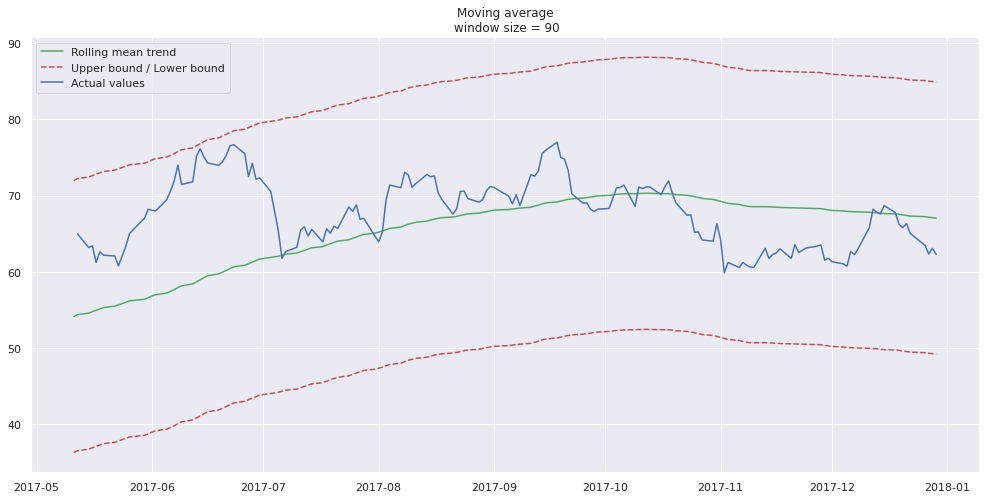

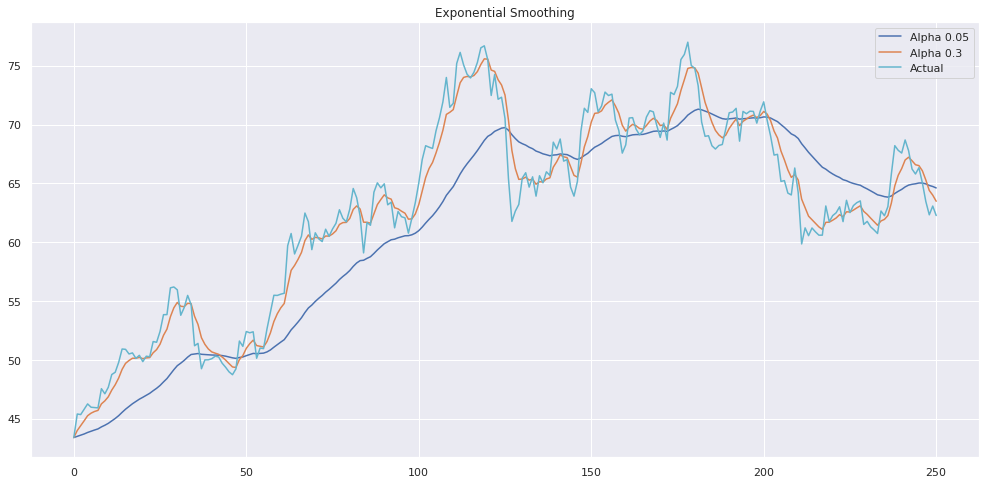

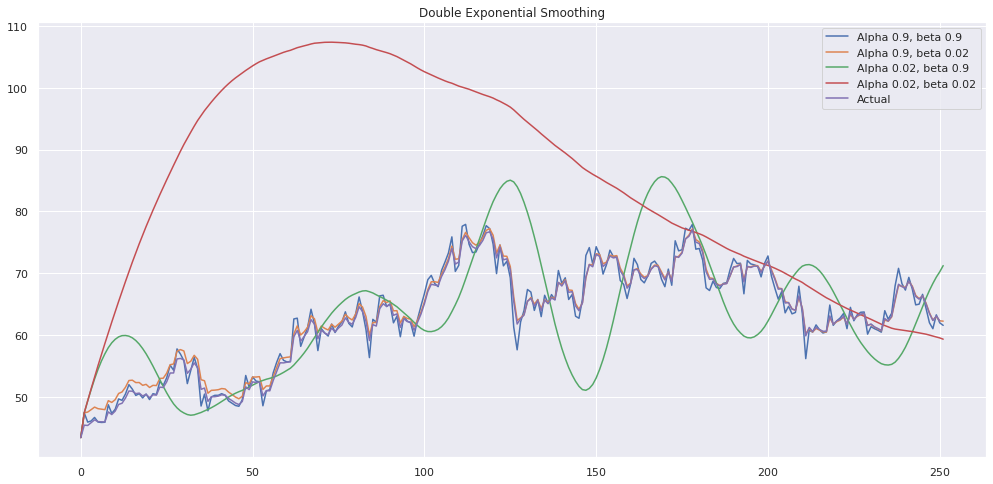

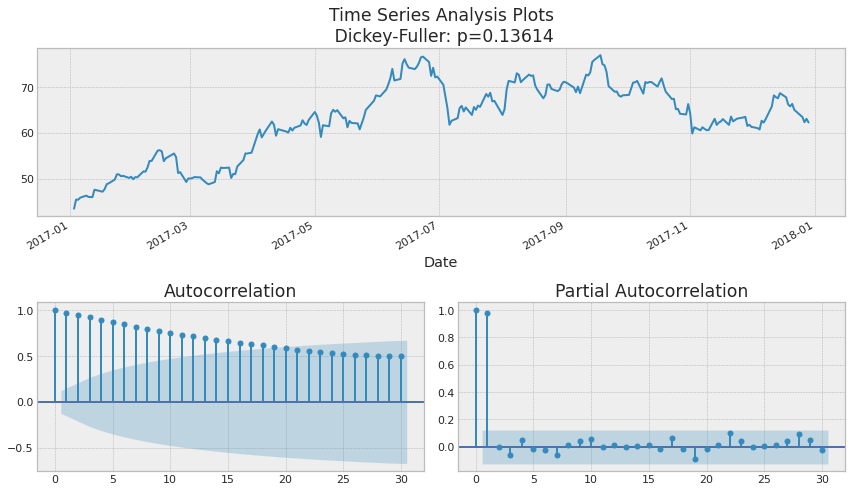

In [20]:
### LIBRARY IMPORT
from datetime import datetime
from iexfinance.stocks import get_historical_data
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')


def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true))
    

### DATA PULL
start = datetime(2017, 1, 1)
end = datetime(2018, 1, 1)

df = wb.DataReader('TSLA','yahoo', start, end)
data=pd.DataFrame(df)

# drop_cols = ['ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']
# data.drop(drop_cols, axis=1, inplace=True)

plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of TSLA')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()


def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Close, 30)

#Smooth by previous quarter (90 days)    
plot_moving_average(data.Close, 90, plot_intervals=True)

# Exponential_smoothing
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
    
plot_exponential_smoothing(data.Close, [0.05, 0.3])


### double_exponential_smoothing:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])


### tsplot:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

data

                High       Low      Open     Close    Volume  Adj Close  \
Date                                                                      
2017-12-22 -0.008486 -0.007331 -0.000243 -0.019670 -0.039396  -0.019670   
2017-12-26 -0.021318 -0.025695 -0.017388 -0.024624  0.037844  -0.024624   
2017-12-27 -0.019514 -0.018587 -0.024476 -0.017968  0.073450  -0.017968   
2017-12-28 -0.005872 -0.003901 -0.013541  0.011866 -0.087735   0.011866   
2017-12-29  0.001866  0.001485  0.014110 -0.012797 -0.133416  -0.012797   

                MSFT  
Date                  
2017-12-22  0.000117  
2017-12-26 -0.001287  
2017-12-27  0.003623  
2017-12-28  0.000117  
2017-12-29 -0.002102  


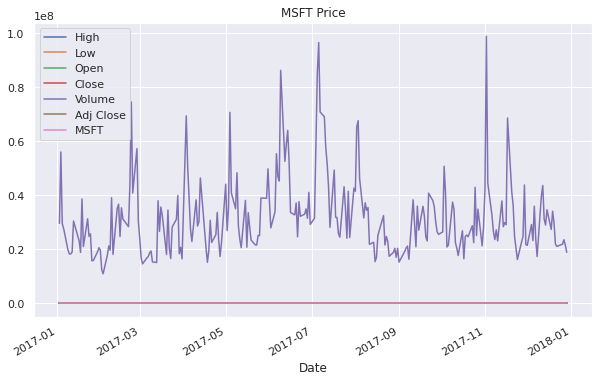

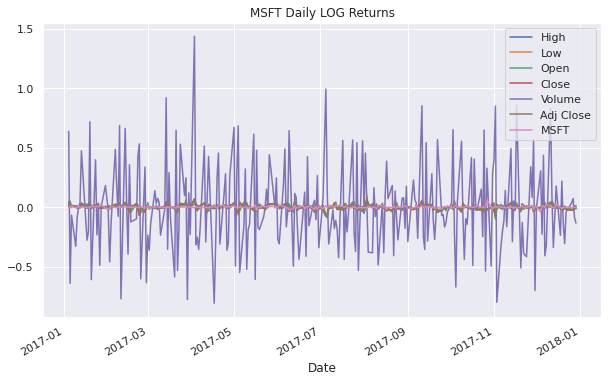

u = High         0.001448
Low          0.001540
Open         0.001545
Close        0.001444
Volume      -0.001800
Adj Close    0.001444
MSFT         0.001338
dtype: float64

var = High         0.000406
Low          0.000475
Open         0.000550
Close        0.000498
Volume       0.143280
Adj Close    0.000498
MSFT         0.000086
dtype: float64

drift = High         0.001245
Low          0.001302
Open         0.001270
Close        0.001195
Volume      -0.073440
Adj Close    0.001195
MSFT         0.001295
dtype: float64

stdev = High         0.020137
Low          0.021790
Open         0.023456
Close        0.022307
Volume       0.378523
Adj Close    0.022307
MSFT         0.009290
dtype: float64


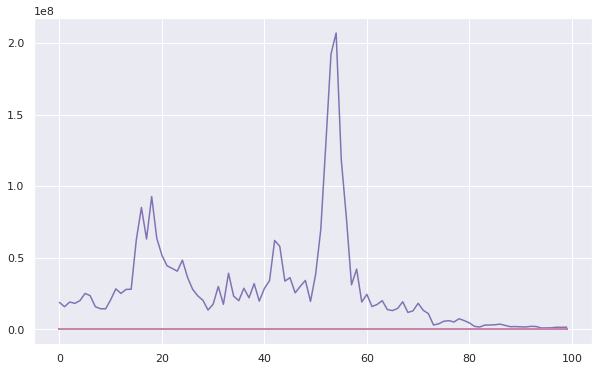

In [12]:
############ Using Monte Carlo simulation to forecast stock prices – part 1
### LIBRARY IMPORT
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline

### DATA IMPORT
ticker = 'MSFT'
data1 = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', 
                             start='2015-1-1')['Adj Close']

### CALCULATE RETURNS
log_returns = np.log(1 + data.pct_change())
print(log_returns.tail())

### PLOT RESULTS
data.plot(figsize=(10, 6));
plt.title('MSFT Price')
log_returns.plot(figsize = (10, 6))
plt.title('MSFT Daily LOG Returns')
plt.show()


### Brownian Motion
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

print('u = '+str(u))
print('')
print('var = '+str(var))
print('')
print('drift = '+str(drift))
print('')
print('stdev = '+str(stdev))


################# Monte Carlo Simulation To Forecast Stock Prices – Part 2
#type(drift)
#type(stdev)
np.array(drift)
drift.values
stdev.values
norm.ppf(0.95)
x = np.random.rand(10, 2)
norm.ppf(x)
Z = norm.ppf(np.random.rand(10,2))
t_intervals = 100
iterations = 1


daily_returns = np.exp(drift.values+stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))

############## Monte Carlo Simulation To Forecast Stock Prices – Part  3
# The preceding price is the first stock price that we will enter in the list.
# Then we will insert the other stock prices. This list should have the same 
# size as that of the daily_returns array. The stock price list will be equal
# to that of the daily_returns array size.
# We will be using a method which is zeros_like() within the NumPy library, 
    #which will be used to create an array. The code is as follows:

S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)

# From the preceding output, we have obtained an array of 1,000 by 10 elements,
    # similar to the dimensions of the daily returns, that we can now fill with zeros.
    # This step is necessary to replace all the zero values with the expected stock prices.
    # First, we must set the first row of our price list to S0. Note that S0 will be the
    # initial value for each of the 10 iterations we intend to generate. 
    # The code is as follows:
    
price_list[0] = S0


# We can now create our stock price list, wherein we will run a loop from
    # day 1 to the 1000th day. The expected price of the stock on any day t 
    # will be calculated as stock price at t-1 times the daily returns observed on day t.
    # The code is as follows:
    
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

plt.figure(figsize=(10,6))
plt.plot(price_list);

#print('From the preceding output, we will obtain 10 possible paths of the expected \
#stock price of Microsoft (MSFT), starting from the last day present in the dataset. \
#We call these trends iterations, since we iterated through the provided formula 10 times. \
#Here, we have the paths that we simulated.')

## Monte Carlo simulations in finance

### Simulating stock price dynamics using Geometric Brownian Motion


[*********************100%***********************]  1 of 1 completed
Downloaded 253 rows of data.


Text(0.5, 1.0, 'MSFT returns: 2019-03-20 - 2020-03-20')

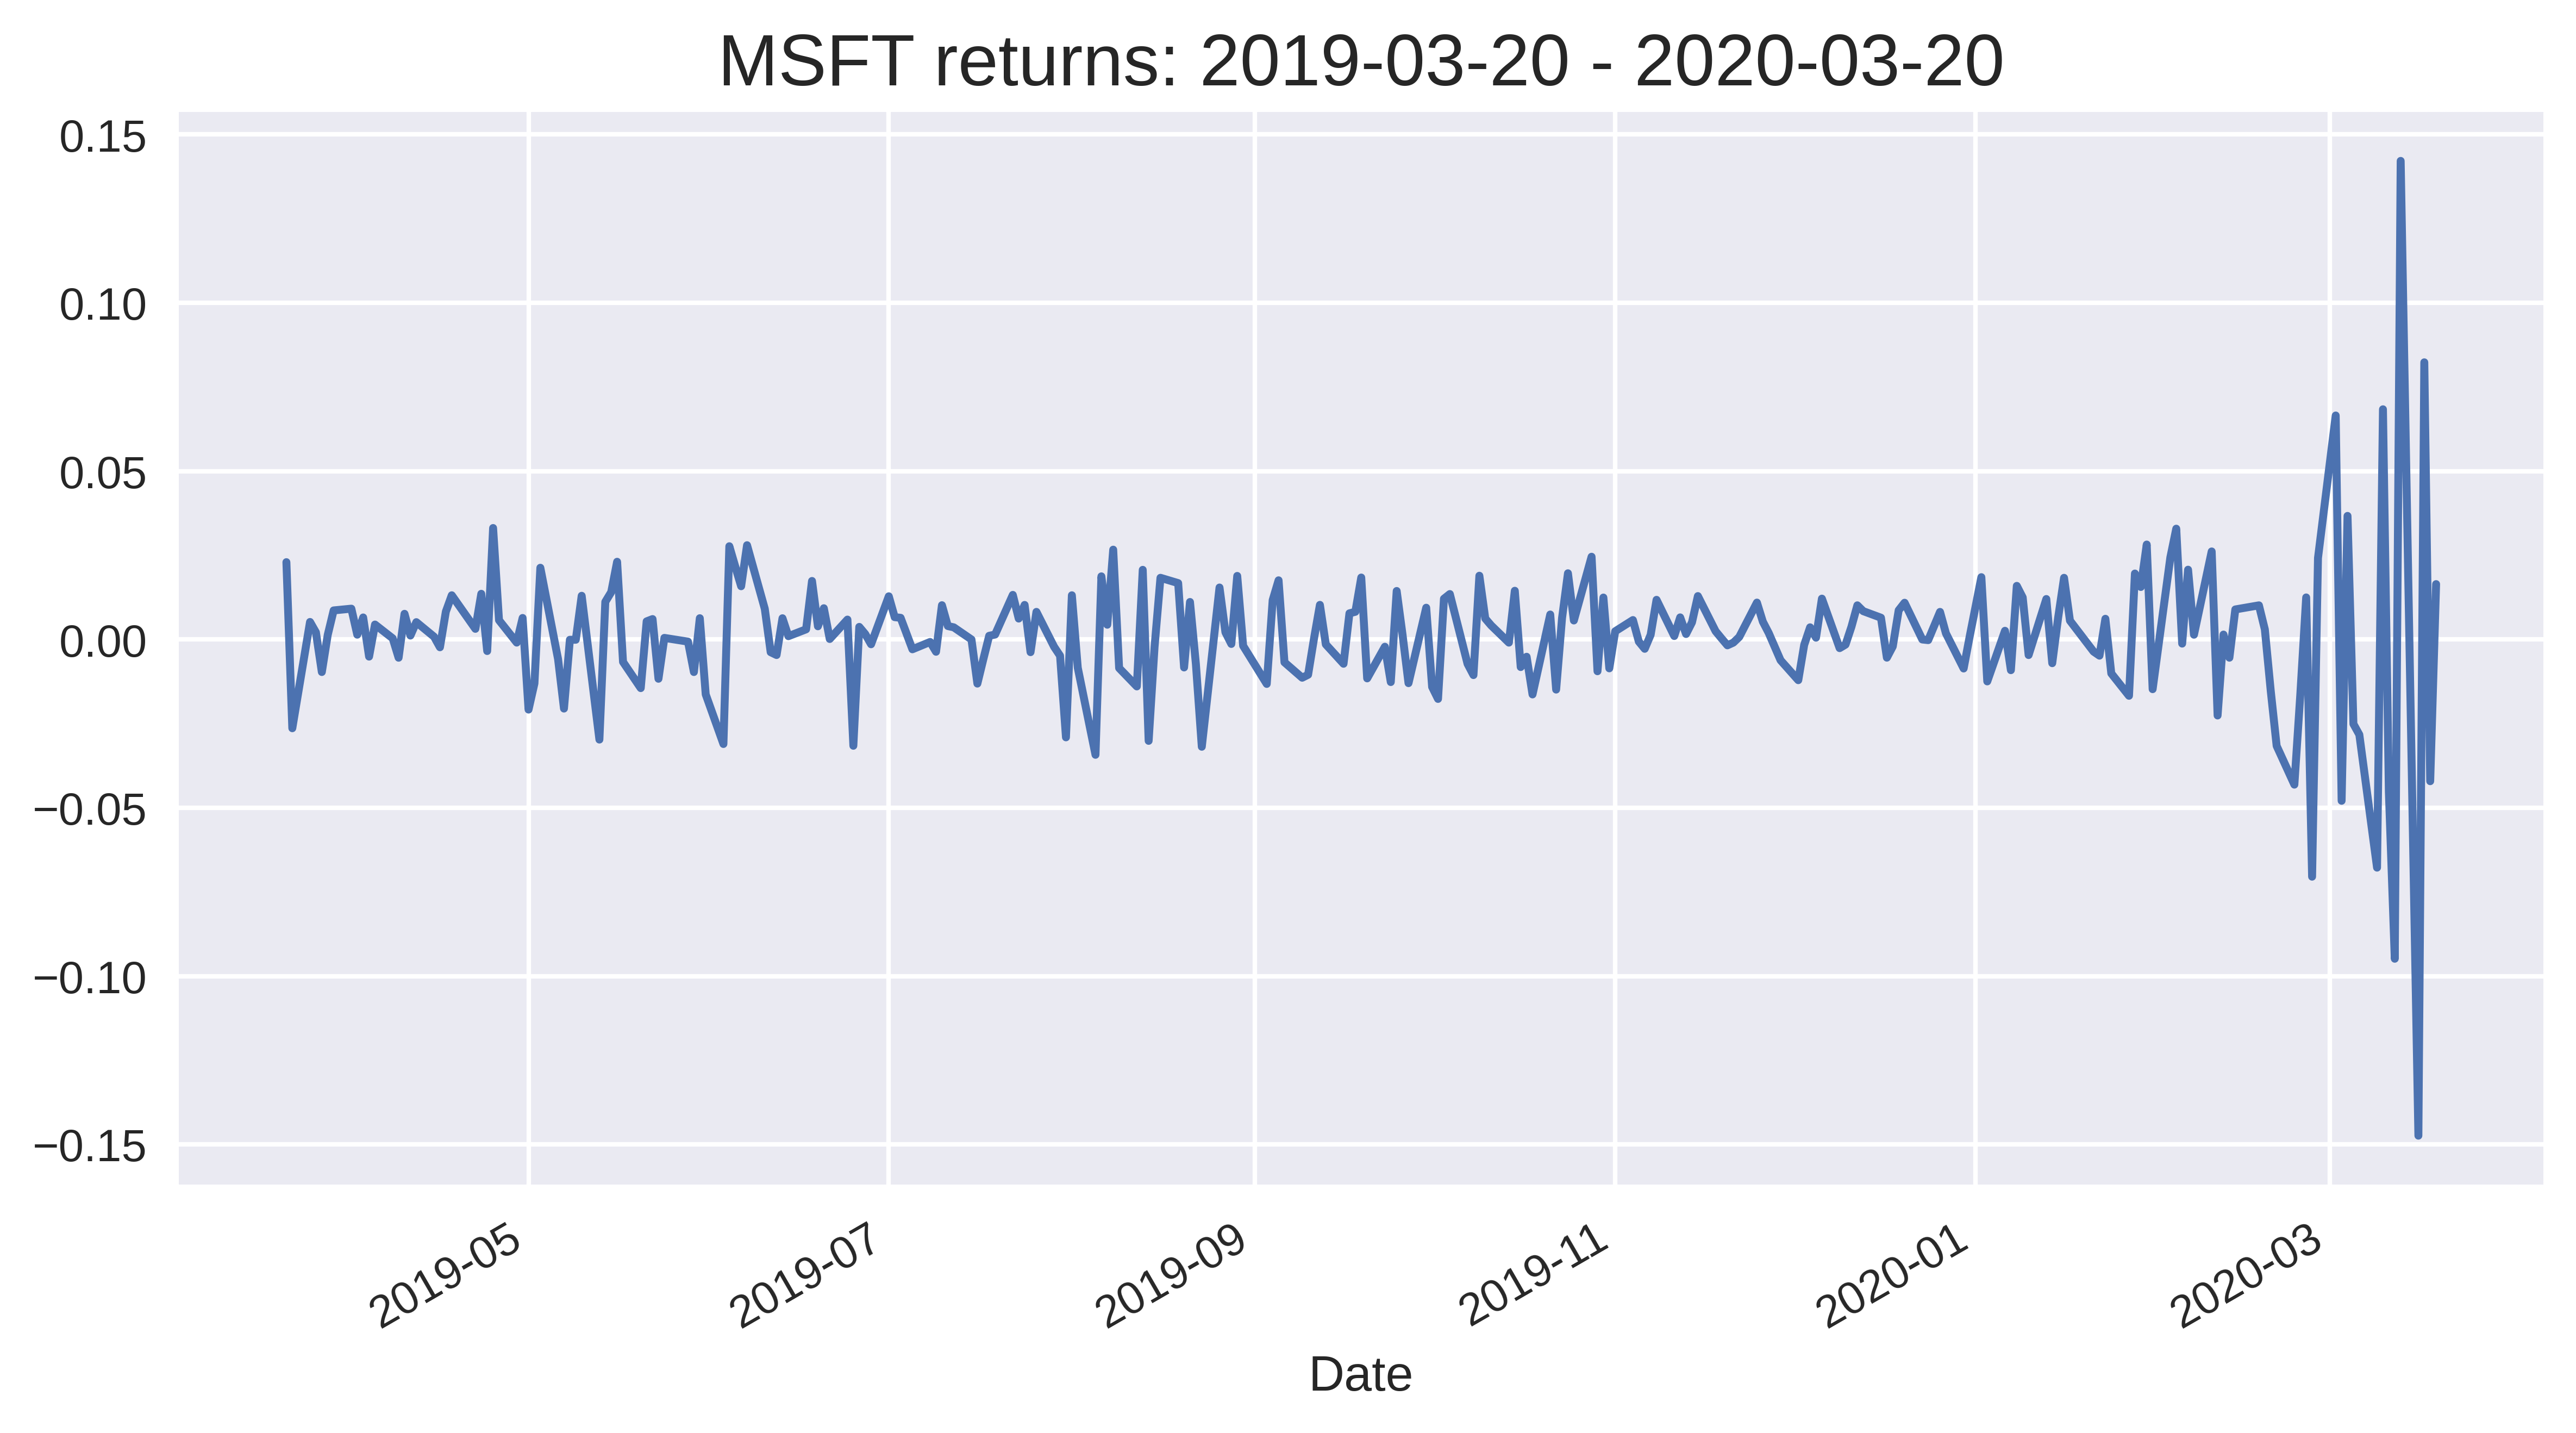

Average return: 0.11%


KeyError: datetime.date(2020, 1, 31)

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import yfinance as yf


### 2. Define parameters for downloading data:
RISKY_ASSET = 'MSFT'
START_DATE = '2019-03-20'
END_DATE = '2020-03-20'


### 3. Download data from Yahoo Finance:
df = yf.download(RISKY_ASSET, start=START_DATE, 
                 end=END_DATE, adjusted=True)
print(f'Downloaded {df.shape[0]} rows of data.')


### 4. Calculate daily returns:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}', 
             fontsize=16)

plt.tight_layout()
#plt.savefig(r'C:/Users/Gordon D. Pisciotta/OneDrive/Desktop/NOTEBOOKS/temp/images/ch6_im1.png')
plt.show()

print(f'Average return: {100 * returns.mean():.2f}%')


### 5. Split data into the training and test sets:
train = returns['2019-03-20':'2020-01-31']
test = returns['2020-02-01':'2030-03-20']


### 6. Specify the parameters of the simulation:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1].date()]
N_SIM = 100
mu = train.mean()
sigma = train.std()



### 7. Define the function used for simulations:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, 
                 random_seed=42):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.
    
    Parameters
    ------------
    s_0 : float
        Initial stock price
    mu : float
        Drift coefficient
    sigma : float
        Diffusion coefficient
    n_sims : int
        Number of simulations paths
    dt : float
        Time increment, most commonly a day
    T : float
        Length of the forecast horizon, same unit as dt
    N : int
        Number of time increments in the forecast horizon
    random_seed : int
        Random seed for reproducibility

    Returns
    -----------
    S_t : np.ndarray
        Matrix (size: n_sims x (T+1)) containing the simulation results. 
        Rows respresent sample paths, while columns point of time.
    '''
    np.random.seed(random_seed)
    
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps 
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t


### 8. Run the simulations:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)


### 9. Plot simulation results:
# prepare objects for plotting 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation '
              f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), 
                                  index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
#plt.savefig(r'C:/Users/Gordon D. Pisciotta/OneDrive/Desktop/NOTEBOOKS/temp/images/ch6_im2.png')
plt.show()